- Importando bibliotecas e carregando os dados.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import special
import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
url='https://raw.githubusercontent.com/robertferro/detectando_fraude/main/1-%20ETL/dados_fraude.csv'

In [3]:
fraude_df = pd.read_csv(url, header=0)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


- Visualizando a distribuição por gênero.

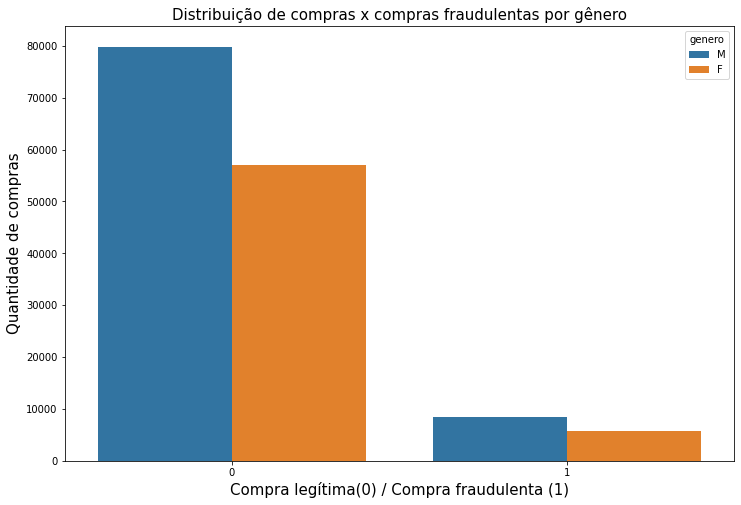

In [40]:
fig , ax  = plt.subplots(1,1 ,figsize=(12,8))
ax = sns.countplot(x='fraude',hue='genero',data=fraude_df)
ax.set_xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
ax.set_ylabel('Quantidade de compras', fontsize=15)
ax.set_title('Distribuição de compras x compras fraudulentas por gênero',fontsize=15)
ax=ax

Relação entre valor de compra e fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


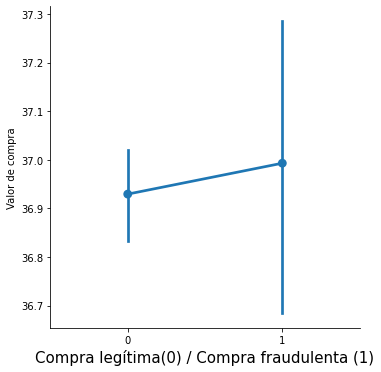

In [41]:
sns.factorplot(x='fraude',y='valor',data=fraude_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Valor de compra')
plt.show()

Relação entre idade e fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


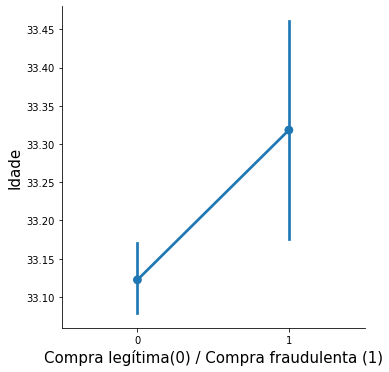

In [42]:
sns.factorplot(x='fraude',y='idade',data=fraude_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Idade',fontsize=15)
plt.show()

Relação da fonte de marketing com fraude.

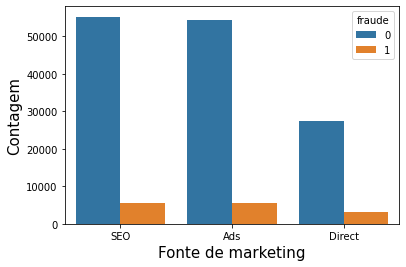

In [47]:
sns.countplot(x='fonte', hue='fraude',data=fraude_df)
plt.xlabel('Fonte de marketing', fontsize=15)
plt.ylabel('Contagem',fontsize=15)
plt.show()

Visualizando as fraudes por país.

In [48]:
#  criando 2 novos datasets para gerar as visualiazções.

sum_f = fraude_df[fraude_df['fraude']==1]['fraude'].groupby(fraude_df.pais).sum()
sum_f = sum_f.to_frame().reset_index()


sum_nf = fraude_df[fraude_df['fraude']==0]['fraude'].groupby(fraude_df.pais).sum()
sum_nf = sum_nf.to_frame().reset_index()

In [52]:
sum_f.sort_values('fraude',ascending=False)

,pais,fraude
103,United States,5551
17,China,1043
47,Japan,715
102,United Kingdom,477
50,Korea Republic of,380
...,...,...
29,Estonia,1
20,Cote D'ivoire,1
12,Bosnia and Herzegowina,1
2,Angola,1


Text(0, 0.5, 'Países')

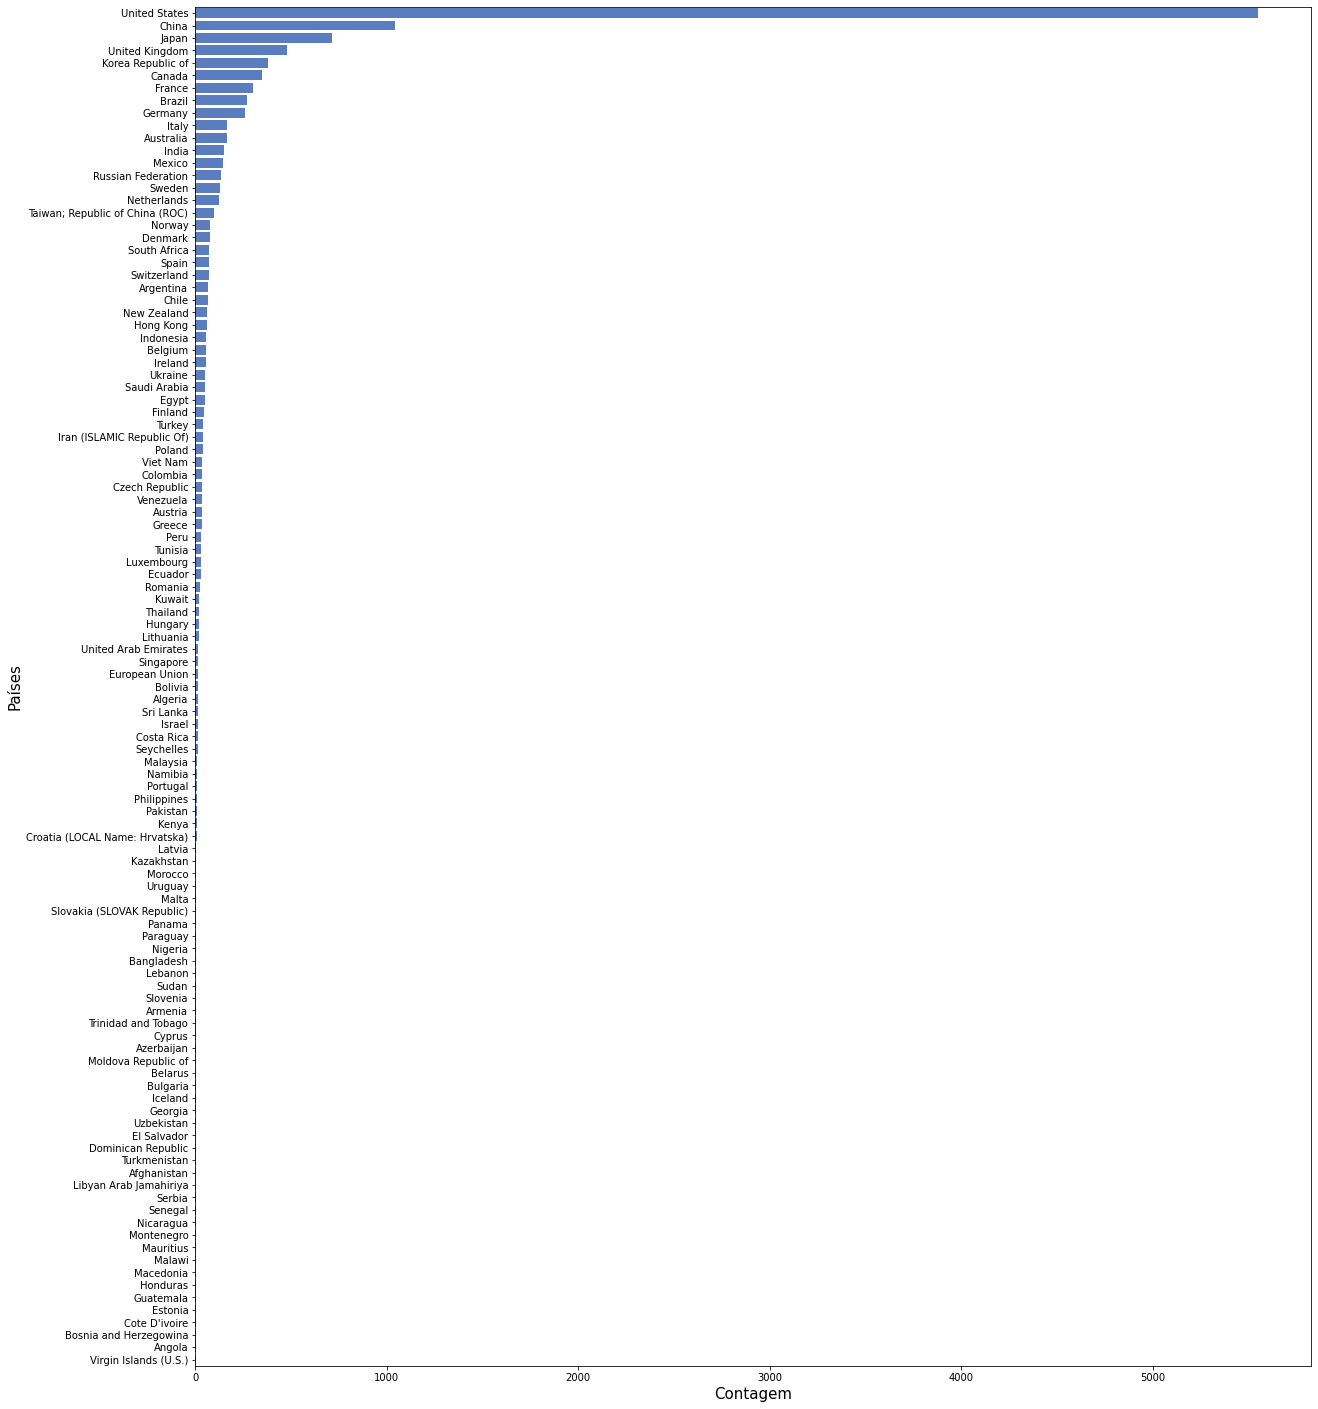

In [53]:
f,ax = plt.subplots(figsize=(20,25))
sns.set_color_codes('muted')
sns.barplot(x='fraude', y='pais', data=sum_f.sort_values('fraude',ascending=False),
           label = 'Total', color='b')
plt.xlabel('Contagem',fontsize=15)
plt.ylabel('Países',fontsize=15)

Contando o número de ids por usuário pra cada dispositivo e pra cada IP.

In [72]:
tmp_df = pd.DataFrame(columns=('fraude','id_por_dispositivo','id_por_ip'))
tmp_df['fraude'] = fraude_df['fraude']

userid_count = fraude_df.groupby('id_dispositivo').id.count()
tmp_df['id_por_dispositivo'] = fraude_df['id_dispositivo'].apply(lambda x: userid_count[x])

userid_count2 = fraude_df.groupby('ip').id.count()
tmp_df['id_por_ip'] = fraude_df['ip'].apply(lambda x: userid_count2[x])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


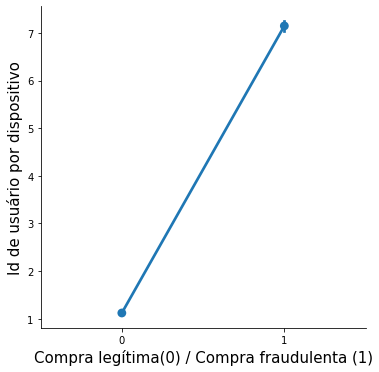

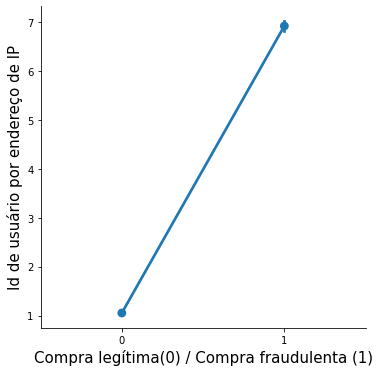

In [76]:
sns.factorplot(x='fraude',y='id_por_dispositivo',data=tmp_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Id de usuário por dispositivo',fontsize=15)


sns.factorplot(x='fraude',y='id_por_ip',data=tmp_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Id de usuário por endereço de IP',fontsize=15)
plt.show()


Relação entre tempo de inscrição e a compra da fraude.

In [77]:
tmp_df['cadastro'] = fraude_df.cadastro.apply(pd.to_datetime)
tmp_df['compra'] = fraude_df.compra.apply(pd.to_datetime)


#  tempo até effetuar a compra

tmp_df['tempo'] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


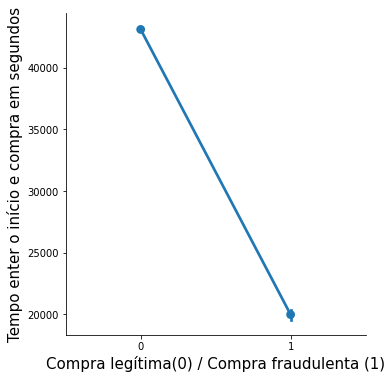

In [79]:
sns.factorplot(x='fraude', y='tempo', data=tmp_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Tempo enter o início e compra em segundos',fontsize=15)
plt.show()

In [81]:
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Analisando os dias dda semana que costumam acontecer fraudes.

Text(0, 0.5, 'Contagem')

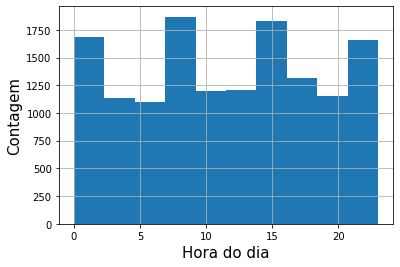

In [82]:
tmp_df[tmp_df['fraude']==1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel('Hora do dia', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

Text(0, 0.5, 'Contagem')

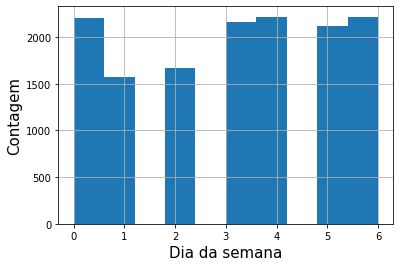

In [83]:
tmp_df[tmp_df['fraude']==1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel('Dia da semana', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

Text(0, 0.5, 'Contagem')

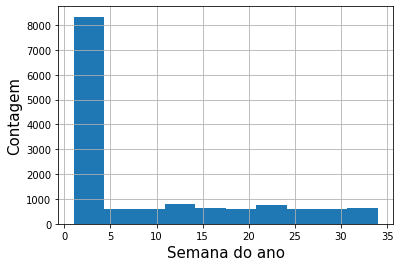

In [84]:
tmp_df[tmp_df['fraude']==1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel('Semana do ano', fontsize=15)
plt.ylabel('Contagem', fontsize=15)